# The goals of this notebook :

* **[Part 1: Exploratory Data Analysis](#Part-1:-Exploratory-Data-Analysis)**  
* **[Part 2: Machine Learning](#Part-2:-Machine-Learning)**
* **[Part 3: Model Selection And Boosting](#Part-3:-Model-Selection-And-Boosting)**

Start by importing the necerrary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

DATA_DIR='../input'
print(os.listdir(DATA_DIR))

['data_description.txt', 'train.csv', 'survey_results_schema.csv', 'sample_submission.csv', '.~lock.test_titanic.csv#', 'test.csv', 'test_titanic.csv', 'gender_submission.csv', 'survey_results_public.csv.zip', 'train_titanic.csv', '.~lock.train_titanic.csv#']


In [2]:
# Dummy variables to hold dataset file names on my local machine
TRAIN_CSV_FILE = "../input/train_titanic.csv"
TEST_CSV_FILE = "../input/test_titanic.csv"
df_train = pd.read_csv(TRAIN_CSV_FILE)
df_test = pd.read_csv(TEST_CSV_FILE)

## Part 1: Exploratory Data Analysis

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Both datasets have missing values for Age and Cabin

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Do some basic statistics

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


How many survived?

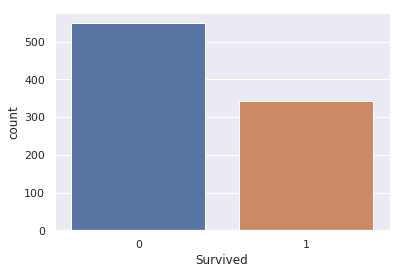

In [11]:
sns.countplot(data=df_train, x='Survived')

**Who has more survivors? Males or females?**

In [12]:
df_train.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

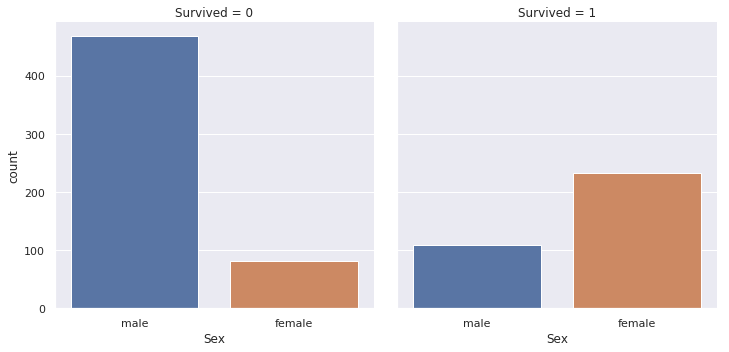

In [13]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train)

Show Gender survival percentages

In [14]:
women_survived = df_train[df_train.Sex == 'female'].Survived.sum()
men_survived = df_train[df_train.Sex == 'male'].Survived.sum()
total_female_survived = df_train[df_train.Sex == 'female'].Survived.count()
total_male_survived = df_train[df_train.Sex == 'male'].Survived.count()
print(women_survived,men_survived,total_female_survived, total_male_survived, sep=' ')
print('Women Survived --> {:<7.3f}%'.format(women_survived/total_female_survived * 100))
print('Men Survived --> {:<7.3f}%'.format(men_survived/total_male_survived * 100))

233 109 314 577
Women Survived --> 74.204 %
Men Survived --> 18.891 %


Do some pie charts for gender survival

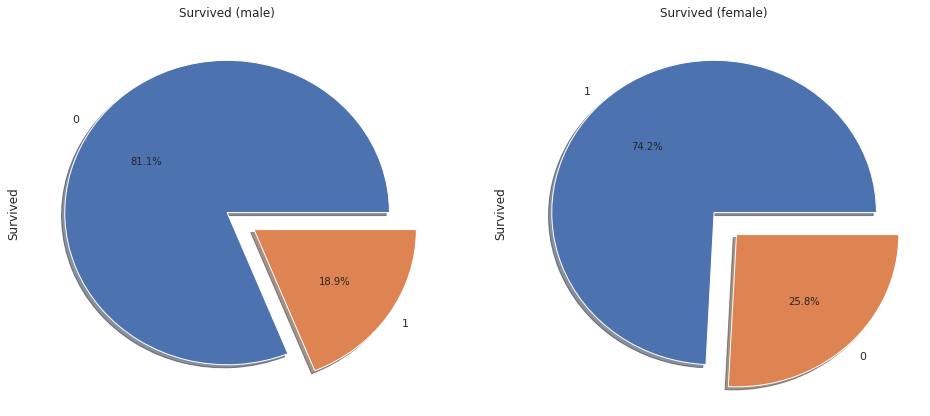

In [15]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

**Let's see if survivors depends of passenger class**

In [16]:
df_train.groupby(['Survived', 'Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

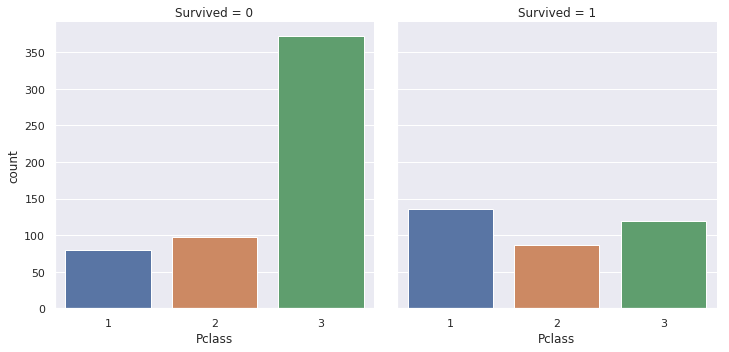

In [17]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df_train)

The majority of those who did not survive were from the 3rd class, while the survivors are almost the same for all classes.

In [18]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Display some percentages again**

In [19]:
pd_class_p = pd.crosstab(df_train.Pclass, df_train.Survived, margins=True,normalize='index')
pd_class_p

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


In [20]:
pd_class_p[1][3]

0.24236252545824846

In [21]:
print('Survivals per class percentages :')
for i in range(3):
    print('Class {} --> {:<7.3f}%'.format(i+1,pd_class_p[1][i+1]*100))

Survivals per class percentages :
Class 1 --> 62.963 %
Class 2 --> 47.283 %
Class 3 --> 24.236 %


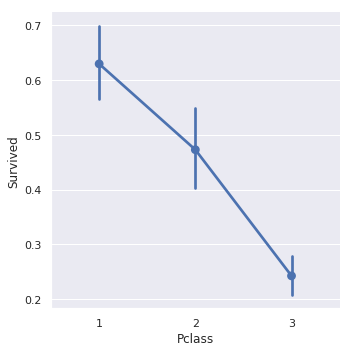

In [22]:
sns.catplot('Pclass','Survived', kind='point', data=df_train)

**Passenger Class and Sex :**

In [23]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

In [24]:
cl_sex_sur_per = pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True)
cl_sex_sur_per

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

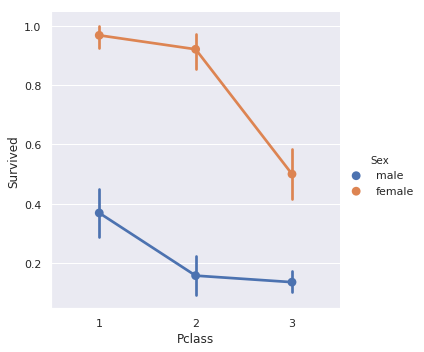

In [25]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df_train);

It seems like almost women in Pclass 1 and Pclass 2 survived 
and almost men in Pclass 2 and Pclass 3 not survived.

**Lets examine the relationship between Survived and Embarked**

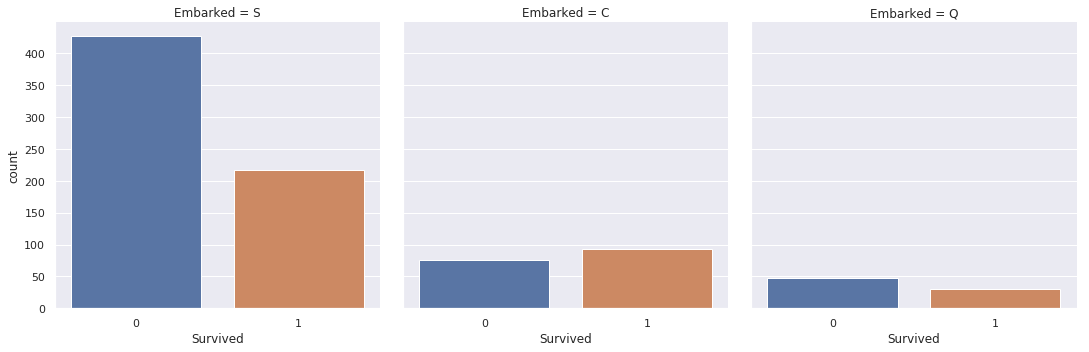

In [26]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

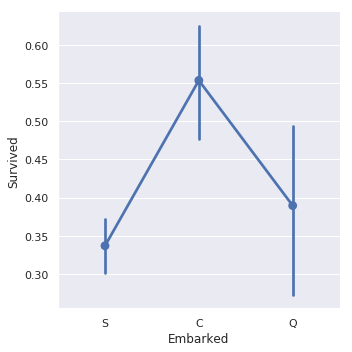

In [27]:
sns.catplot('Embarked','Survived', kind='point', data=df_train);

**Embarked and Sex**

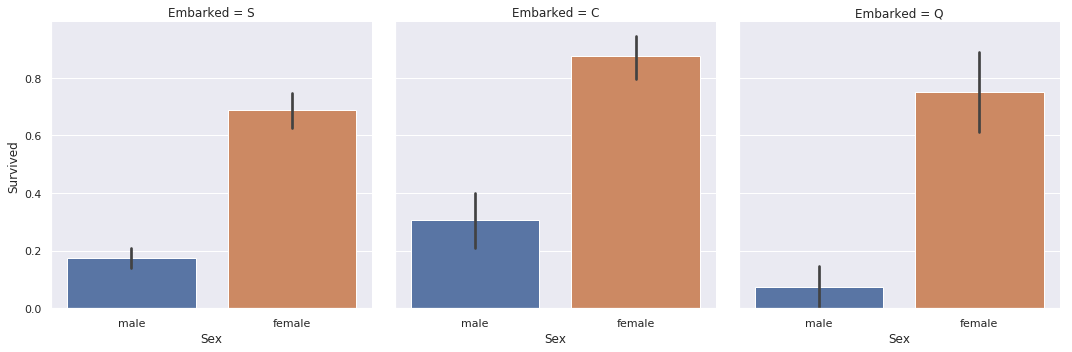

In [28]:
sns.catplot(x='Sex',y='Survived', col='Embarked', kind='bar', data=df_train)

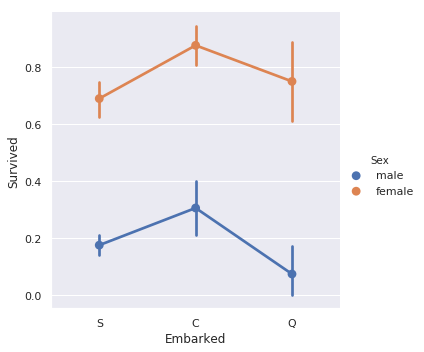

In [29]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

**Embarked, Pclass and Sex :**

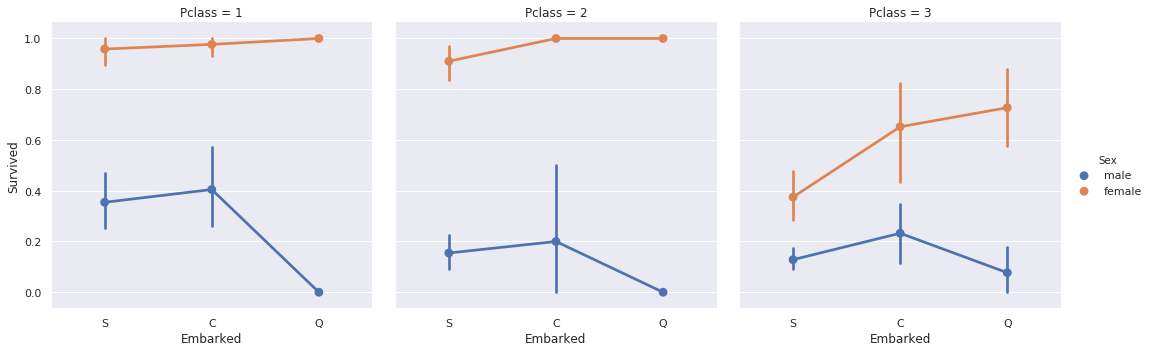

In [30]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train)

* All women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.

* All men of Pclass 1 and 2 embarked in Q have not survived, survival rate for men in Pclass 2 and 3 is always below 0.2
* For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4

In [31]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

Let's look at the survivors based on their age and we will slowly 
add the other factors we have studied so far.

First we 'll create 8 bins with age.

In [32]:
for df in [df_train, df_test]:
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i

In [33]:
df_train[['Age', 'Age_bin']].head(20)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


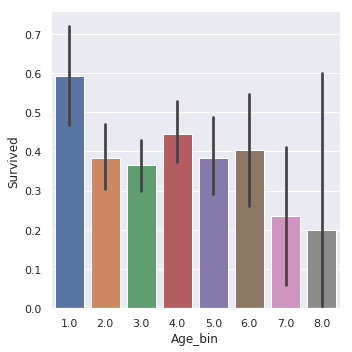

In [34]:
sns.catplot(x='Age_bin',y='Survived',  kind='bar', data=df_train)

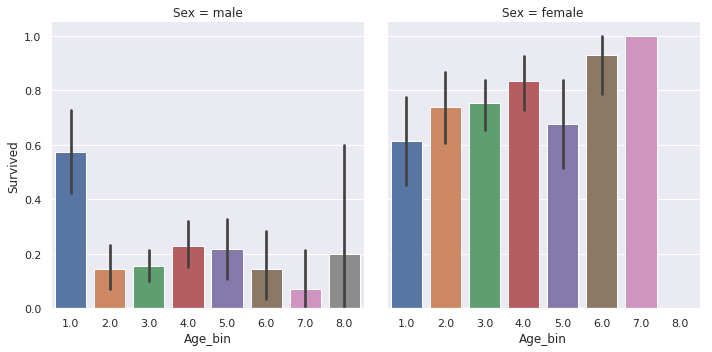

In [35]:
sns.catplot(x='Age_bin',y='Survived',col='Sex',  kind='bar', data=df_train)

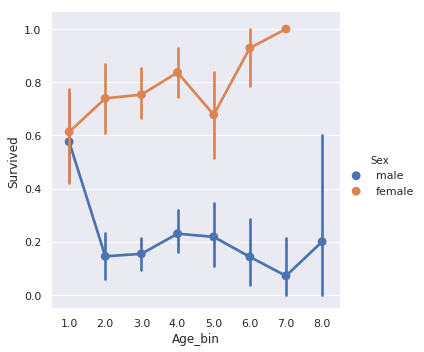

In [36]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data=df_train)

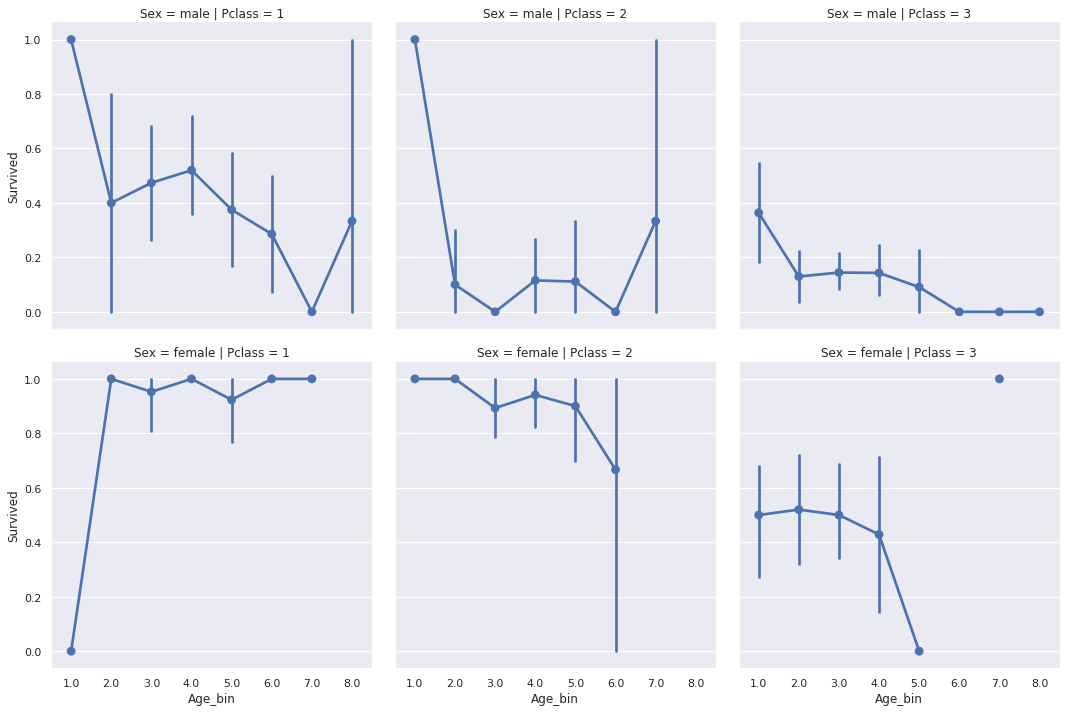

In [37]:
sns.catplot('Age_bin','Survived', col='Pclass', row = 'Sex', kind='point', data=df_train);

In [38]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

**Conclusions**

* All males in Age_bin 1 (age <= 10 ) in Pclass 1 and Pclass 2 survived.
* All females in Pclass 3 with 50 <= age < 60 died.

**SibSp and Parch**

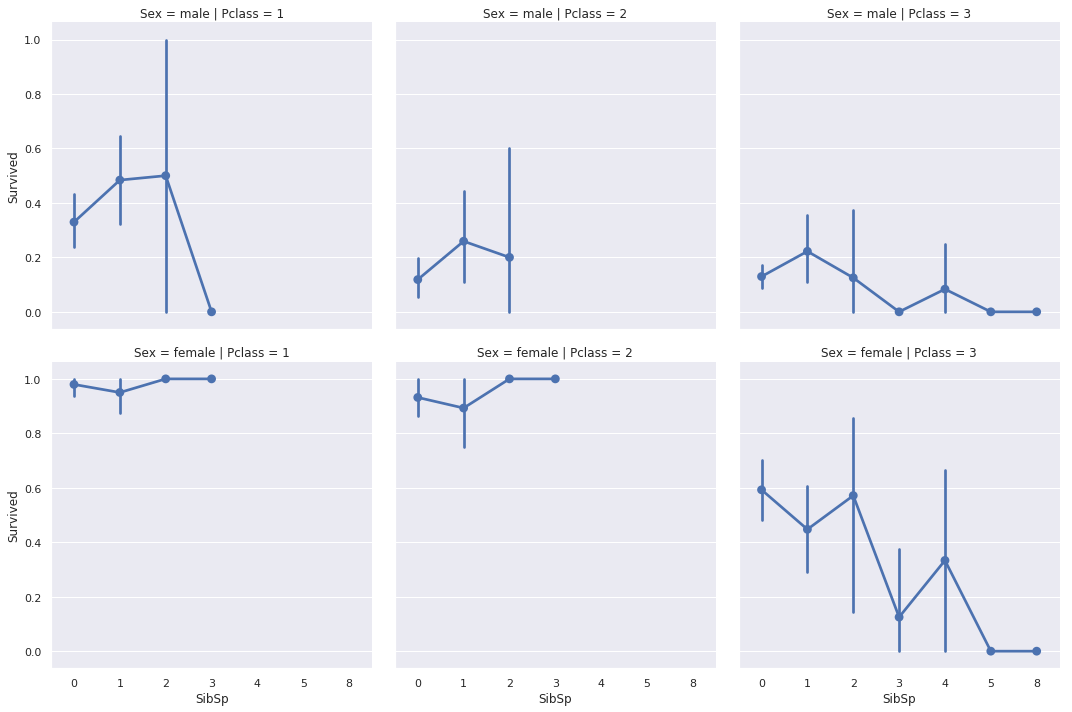

In [39]:
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [40]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, no survival, rate above 0.5 for any values of SibSp. For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

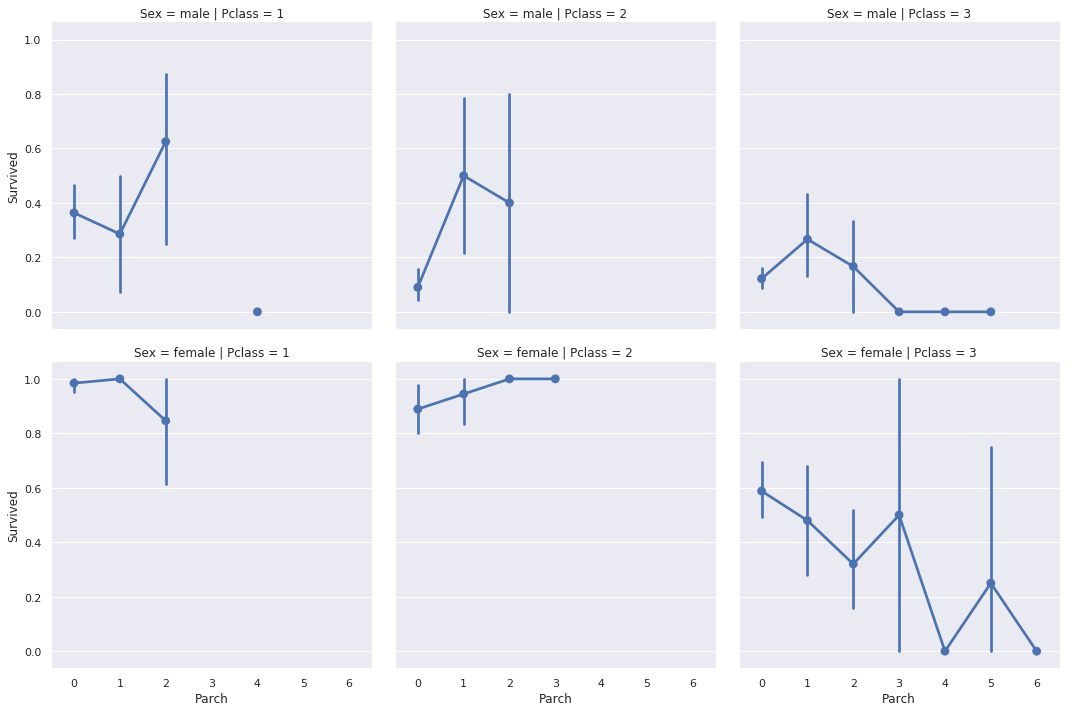

In [41]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [42]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

Very similar to SibSp, but different values.
* For females with Parch = 2 and Pclass = 3 survival rate is below 0.5  
* All females with Parch = 4 and Pclass = 3 died.
* All females with Parch > 4 died.
* For females with Parch = 1 and Pclass = 3 survival rate is below 0.5
* For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

**Continue with Fare**

Let see it's distribution

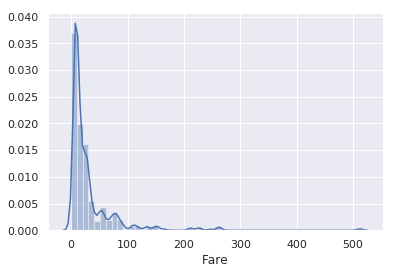

In [43]:
sns.distplot(df_train['Fare'])

Create 12 bin of Fares

In [44]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

In [45]:
df_train['Fare_bin'].head(10)

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
5    1.0
6    2.0
7    1.0
8    1.0
9    1.0
Name: Fare_bin, dtype: float64

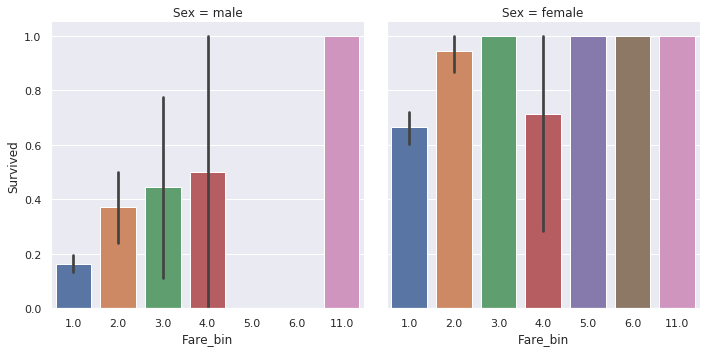

In [46]:
sns.catplot(x='Fare_bin',y='Survived',col='Sex',  kind='bar', data=df_train)

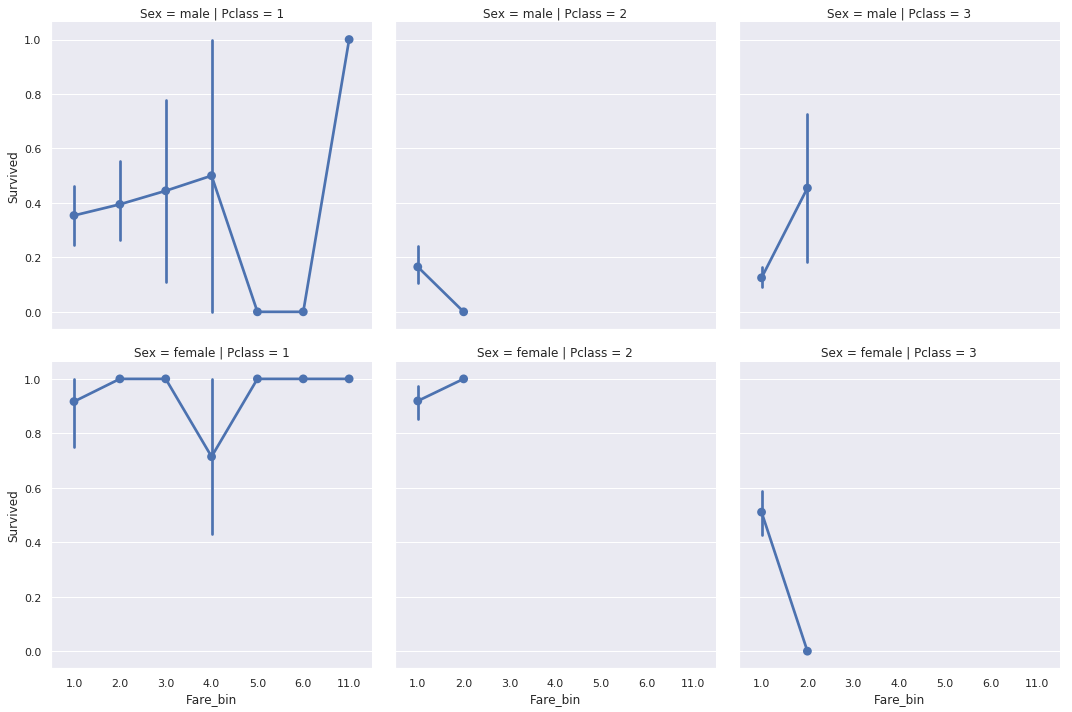

In [47]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

* All males in Pclass 1 and Fare_bin = 11 survived.
* For males in Pclass 2 survival rates < 20%
* For males in Pclass 3 survival rates < 50%
* Females in Pclass 1 and Fare_bin = 2.0, 3.0, 5.0, 6.0, 11.0 survived
* Females in Pclass 2 and Fare_bin = 2.0 survived.
* Females in Pclass 2 and 3 regardless of fares survival rates <= 0.5

In [48]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

## Part 2: Machine Learning

**Data Preparation**

1. Load the original data from csv
2. Encode categorical data
3. Drop columns that we don't need
4. Get the independent and dependent variable
5. Take care of missing data
6. Split the dataset into the trainning and test set

In [49]:
df_train_ml = pd.read_csv(TRAIN_CSV_FILE)
df_test_ml = pd.read_csv(TEST_CSV_FILE)

In [50]:
df_train_ml.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df_test_ml.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
# Encoding categorical data
df_train_ml = pd.get_dummies(data=df_train_ml, columns=['Sex', 'Embarked'], drop_first=True)
df_train_ml.drop(['Name','Ticket', 'Cabin'],axis=1, inplace=True) 

passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(data=df_test_ml, columns=['Sex', 'Embarked'], drop_first=True)
df_test_ml.drop(['Name','Ticket', 'Cabin'],axis=1, inplace=True) 

In [53]:
df_train_ml.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
df_test_ml.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [55]:
X = df_train_ml.iloc[:, 2:].values
y = df_train_ml.iloc[:, 1].values

In [56]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:2])
X[:, 1:2] = imputer.transform(X[:, 1:2])

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**All data for transmision**

In [ ]:
X_train_all = X
y_train_all = y
X_test_all = df_test_ml.iloc[:,1:].values

In [83]:
# Take care of NaNs in all data
imputer = imputer.fit(X_test_all[:, [1,4]])
X_test_all[:, [1,4]] = imputer.transform(X_test_all[:, [1,4]])

**Feature scaling for all data**

In [84]:
sc_all = StandardScaler()
X_train_all = sc_all.fit_transform(X_train_all)
X_test_all = sc_all.transform(X_test_all)

Use this utility function to show metrics

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

def show_metrics(y_test, y_pred,msg='Summary'):
    cm = confusion_matrix(y_test,y_pred)
    cm = sns.heatmap(cm, annot=True, fmt='d')
    print(msg)
    print(classification_report(y_test, y_pred))
    print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

**Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(random_state = 101)
lg_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
# Predicting the Test set results
lg_y_pred = lg_classifier.predict(X_test)

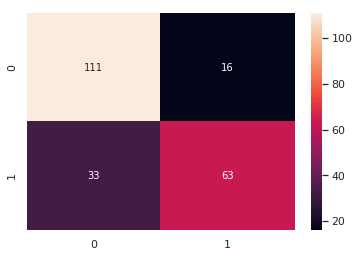

In [65]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, lg_y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [67]:
# Print some metrics
print(classification_report(y_test, lg_y_pred))
print(accuracy_score(y_test, lg_y_pred))

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       127
          1       0.80      0.66      0.72        96

avg / total       0.78      0.78      0.78       223

0.7802690582959642


**Train again for all data and submit**

In [85]:
lg_classifier.fit(X_train_all, y_train_all)
lg_y_pred_all = lg_classifier.predict(X_test_all)

In [87]:
sub_logreg = pd.DataFrame()
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = lg_y_pred_all
#sub_logmodel.to_csv('logmodel.csv',index=False)

**K-Nearest Neighbors (K-NN)**

In [88]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
# Predicting the Test set results
knn_y_pred = knn_classifier.predict(X_test)

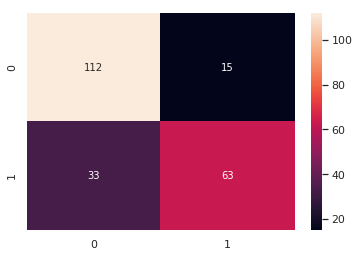

In [91]:
#confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True, fmt='d')

In [92]:
print('K-NN Summary')
print(classification_report(y_test, knn_y_pred))
print(accuracy_score(y_test, knn_y_pred))

K-NN Summary
             precision    recall  f1-score   support

          0       0.77      0.88      0.82       127
          1       0.81      0.66      0.72        96

avg / total       0.79      0.78      0.78       223

0.7847533632286996


Fit again for all data

In [102]:
knn_classifier.fit(X_train_all, y_train_all)
knn_y_pred_all= knn_classifier.predict(X_test_all)

In [103]:
sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = knn_y_pred_all
#sub_knn.to_csv('knn.csv',index=False)

**Support Vector Machine (SVM)**

In [104]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 101)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
# Predicting the Test set results
svm_y_pred = svm_classifier.predict(X_test)

SVM Summary
             precision    recall  f1-score   support

          0       0.76      0.86      0.80       127
          1       0.77      0.64      0.70        96

avg / total       0.76      0.76      0.76       223

0.7623318385650224


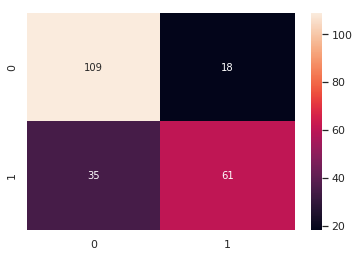

In [107]:
#confusion matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d')
print('SVM Summary')
print(classification_report(y_test, svm_y_pred))
print(accuracy_score(y_test, svm_y_pred))

Fit again for all data

In [118]:
svm_classifier.fit(X_train_all, y_train_all)
svm_y_pred_all= svm_classifier.predict(X_test_all)

In [119]:
sub_svm = pd.DataFrame()
sub_svm['PassengerId'] = df_test['PassengerId']
sub_svm['Survived'] = svm_y_pred_all
#sub_svm.to_csv('svm.csv',index=False)

**Kernel SVM**

In [112]:
# Fitting Kernel SVM to the Training set
ksvm_classifier = SVC(kernel = 'rbf', random_state = 101)
ksvm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
# Predicting the Test set results
ksvm_y_pred = ksvm_classifier.predict(X_test)

Kernel SVM Summary
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       127
          1       0.88      0.66      0.75        96

avg / total       0.82      0.81      0.81       223

0.8116591928251121


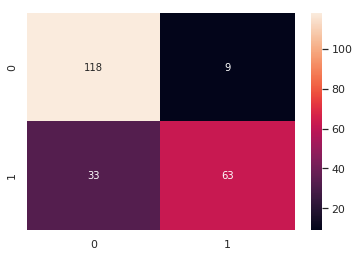

In [115]:
#confusion matrix and metrics for kernel SVM
ksvm_cm = confusion_matrix(y_test, ksvm_y_pred)
sns.heatmap(ksvm_cm, annot=True, fmt='d')
print('Kernel SVM Summary')
print(classification_report(y_test, ksvm_y_pred))
print(accuracy_score(y_test, ksvm_y_pred))

Fit again for all data

In [123]:
ksvm_classifier.fit(X_train_all, y_train_all)
ksvm_y_pred_all= ksvm_classifier.predict(X_test_all)

In [124]:
sub_ksvm = pd.DataFrame()
sub_ksvm['PassengerId'] = df_test['PassengerId']
sub_ksvm['Survived'] = ksvm_y_pred_all
#sub_svm.to_csv('svm.csv',index=False)

**Naive Bayes**

In [125]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [126]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

Confusion matrix and metrics

Naives Bayes Summary
             precision    recall  f1-score   support

          0       0.76      0.83      0.79       127
          1       0.74      0.66      0.70        96

avg / total       0.75      0.75      0.75       223

Accuracy : 0.7533632286995515


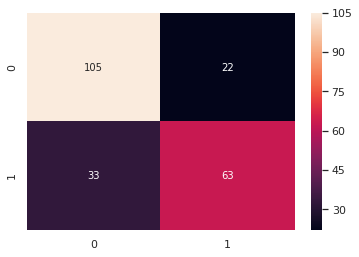

In [134]:
show_metrics(y_test, nb_y_pred, msg='Naives Bayes Summary')

**Random Forest Classification**

In [130]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

/home/nick/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
# Predicting the Test set results
rf_y_pred = rf_classifier.predict(X_test)

Confusion matrix and metrics

Random Forest Summary
             precision    recall  f1-score   support

          0       0.75      0.87      0.81       127
          1       0.78      0.62      0.69        96

avg / total       0.76      0.76      0.76       223

Accuracy : 0.7623318385650224


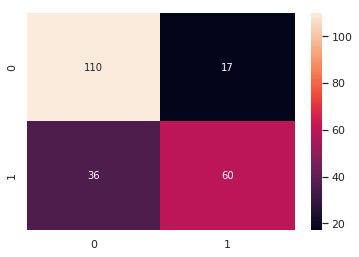

In [135]:
show_metrics(y_test, rf_y_pred, msg='Random Forest Summary')

## Part 3: Model Selection And Boosting

In [137]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ksvm_classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.8232134780642243
0.05709630038825816


In [141]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = ksvm_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [142]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy : {}\n'.format(best_accuracy))
print('Best Parameters : {}\n'.format(best_parameters))

Best Accuracy : 0.8293413173652695

Best Parameters : {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}



<p>Our model is non linear, so the best fit is Kernel SVM.</p>
<p>Lets fit it again using the best parameters</p>

In [143]:
# Fitting Kernel SVM to the Training set
ksvm_classifier = SVC(kernel = 'rbf', C=1, gamma=0.6,random_state = 101)
ksvm_classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
# Predicting the Test set results
ksvm_y_pred = ksvm_classifier.predict(X_test)

Fitting again to all data and submit

In [146]:
ksvm_classifier.fit(X_train_all, y_train_all)
ksvm_y_pred_all= ksvm_classifier.predict(X_test_all)

In [147]:
sub_ksvm = pd.DataFrame()
sub_ksvm['PassengerId'] = df_test['PassengerId']
sub_ksvm['Survived'] = ksvm_y_pred_all
sub_svm.to_csv('svm.csv',index=False)